In [1]:
# standard imports
import sys, os, pickle, datetime, pandas as pd, seaborn as sns, numpy as np, warnings, importlib
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import frolic
importlib.reload(frolic)
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
files = ['000000000000', '000000000001', '000000000002', '000000000003', '000000000004']

In [3]:
df = pd.read_csv('C:/Users/User/Downloads/000000000000')

In [4]:
df

,id,title_length,body_length,accepted_answer_id,answer_count,comment_count,creation_date,favorite_count,last_activity_date,last_edit_date,score,tags,view_count
0,16424677,94,859,NaN,2,11,2013-05-07 17:04:17.89 UTC,NaN,2013-05-08 15:55:49.22 UTC,2013-05-07 17:58:51.447 UTC,-1,wcf|debugging|deployment|windows-server-2008,133
1,40035210,129,3283,NaN,2,15,2016-10-14 04:58:20.33 UTC,1.0,2016-10-14 13:49:53.787 UTC,2016-10-14 13:39:03.447 UTC,0,ios|autolayout|nslayoutconstraint|ios-autolayout,86
2,16145317,90,2021,NaN,1,12,2013-04-22 10:52:05.363 UTC,NaN,2013-04-22 11:07:52.837 UTC,2013-04-22 11:07:52.837 UTC,0,python|class|pickle|typechecking|isinstance,304
3,18036145,20,4607,NaN,0,15,2013-08-03 18:51:12.65 UTC,NaN,2013-08-03 20:14:29.007 UTC,2013-08-03 20:14:29.007 UTC,1,php|mod-rewrite,130
4,31707614,99,4260,31724886.0,2,12,2015-07-29 17:47:59.987 UTC,40.0,2017-07-22 17:40:50.777 UTC,2015-07-29 20:06:12.313 UTC,114,algorithm|haskell|functional-programming|lambd...,3725
5,49076629,136,4614,49190893.0,1,13,2018-03-02 20:12:30.38 UTC,1.0,2018-03-09 09:48:26.29 UTC,2018-03-04 05:27:56.75 UTC,2,kubernetes|google-cloud-platform|google-kubern...,168
6,13422044,87,7251,NaN,1,17,2012-11-16 18:05:27.013 UTC,1.0,2012-11-16 18:43:03.973 UTC,2012-11-16 18:43:03.973 UTC,-1,c++|eclipse,3430
7,29741395,87,3141,29764696.0,3,17,2015-04-20 07:13:13.083 UTC,1.0,2018-02-02 06:51:49.607 UTC,2015-04-20 10:09:16.737 UTC,4,sql|sql-server|select|stored-procedures|sql-se...,9255
8,16339294,19,1405,16339395.0,1,14,2013-05-02 13:29:04.19 UTC,NaN,2013-05-02 13:32:44.837 UTC,NaN,0,java,103
9,32647015,20,7949,NaN,1,18,2015-09-18 08:12:14.9 UTC,NaN,2015-09-18 08:55:19.3 UTC,2015-09-18 08:55:19.3 UTC,2,java|jfilechooser,147


In [5]:
features = ['title_length', 'body_length', 'answer_count', 'comment_count', 'score']
target = 'view_count'

In [6]:
import xgboost
import sklearn

In [7]:
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.33, random_state=42)

In [8]:
model = xgboost.XGBRegressor(n_jobs=8)
model.fit(df_train[features], df_train[target])
df_test['view_count_predict'] = model.predict(df_test[features])

In [9]:
model.feature_importances_

array([ 0.11077844,  0.07634731,  0.20658682,  0.08233533,  0.52395207], dtype=float32)

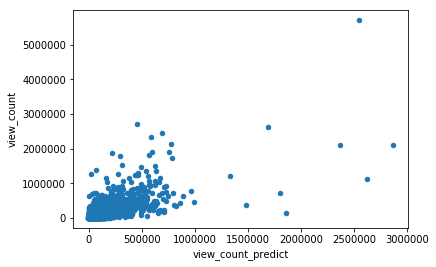

In [10]:
df_test.plot.scatter('view_count_predict', 'view_count')